In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Car_Purchasing_Data.csv')

In [40]:
df.head()

Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [41]:
df.shape

(500, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [43]:
df.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.224000   62127.239608       9607.645049   
std      0.500465    7.990339   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   41.000000   54391.977195       7397.515792   
50%      1.000000   46.000000   62915.497035       9655.035568   
75%      1.000000   52.000000   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [44]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

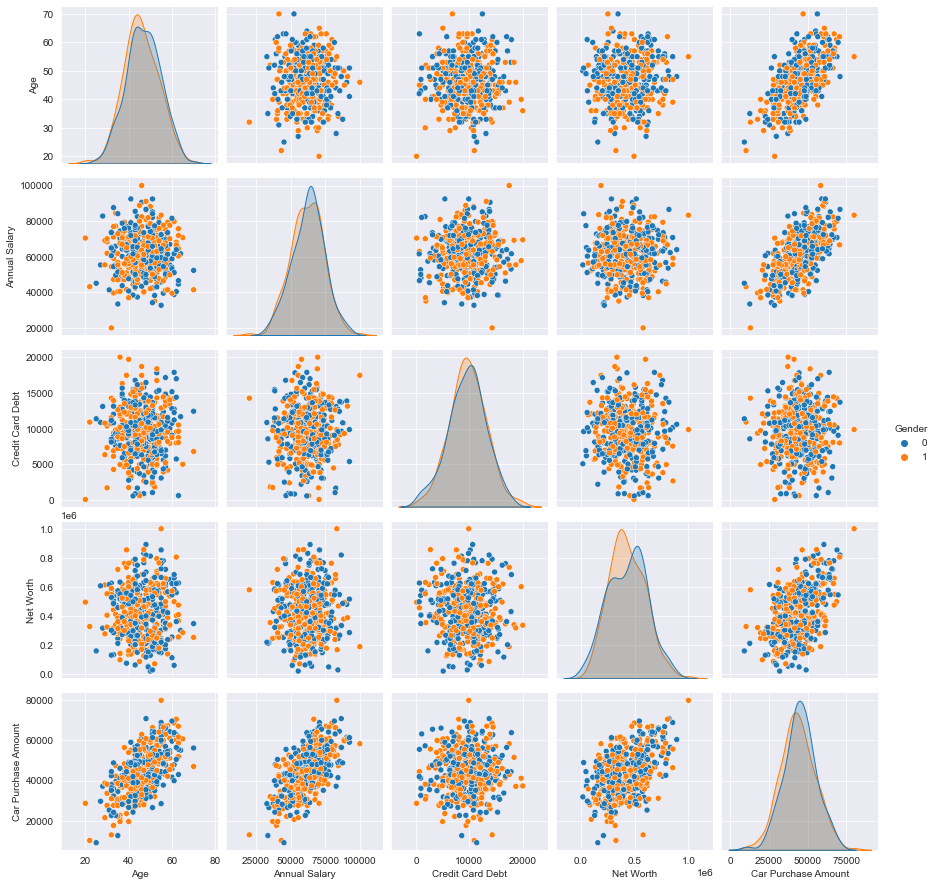

In [45]:
sns.set_style('darkgrid')
g = sns.pairplot(df, hue='Gender')

<AxesSubplot:>

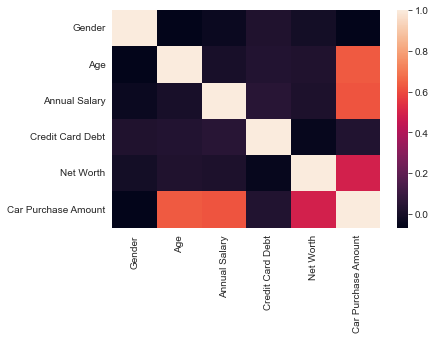

In [46]:
sns.heatmap(df.corr())

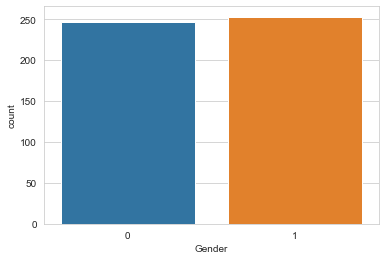

In [47]:
sns.set_style('whitegrid')
g = sns.countplot(x='Gender',data=df)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [50]:
X = df[['Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y = df['Car Purchase Amount']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
print(lm.intercept_)

-42070.418113818836


In [55]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Gender              33.373798
Age                840.914384
Annual Salary        0.561746
Credit Card Debt     0.004059
Net Worth            0.028876

In [56]:
predictions = lm.predict(X_test)

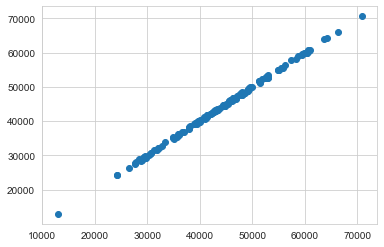

In [57]:
plt.scatter(y_test,predictions)

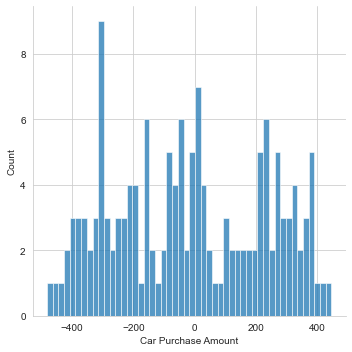

In [58]:
sns.displot((y_test-predictions),bins=50);

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2:', metrics.r2_score(y_test, predictions))

MAE: 211.94466044343187
MSE: 61331.29285217074
RMSE: 247.65155531950683
r2: 0.9993733378621694


In [1]:
df.tolist

NameError: name 'df' is not defined